
📌 **Формат сдачи:**
Ссылка на Google Collab / Jupyter Notebook с вашими действиями и выводами.

🗓️ **Сроки:**

* 10 августа, 23:59 — мягкий дедлайн (до 10 баллов)
* 17 августа, 23:59 — жёсткий дедлайн (до 5 баллов)
* После 17 августа — зачёт/незачёт

---

## 📬 Отправка ответа

Привет! Это твоё второе домашнее задание на курсе.
Отправь ссылку на Google Collab / Jupyter Notebook, в котором ты:

* Выполнил все шаги
* Выделил результаты

Удачи!
**Команда GIGASCHOOL 💚**

---

In [1]:
!pip install transformers sentence-transformers scikit-learn matplotlib tiktoken protobuf


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## 📝 Домашнее задание

### Задание 1: Работа с Hugging Face и pipeline API — *1 балл*

* Выберите модель для суммаризации на русском языке.
* Загрузите её и протестируйте с помощью pipeline.
* Проверьте на 5 различных примерах и проанализируйте результаты.

---

In [2]:
from transformers import pipeline

# Загружаем пайплайн для суммаризации с русской моделью
summarizer = pipeline("summarization", model="d0rj/ru-mbart-large-summ")

/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0


In [3]:
texts = [
    "В ходе международной конференции по климатическим изменениям ученые представили новые данные о темпах глобального потепления. Среди ключевых причин отмечаются антропогенные выбросы парниковых газов и изменение использования земель. Эксперты призвали государства к срочным мерам по сокращению вредных выбросов.",
    "В романе Льва Толстого «Война и мир» подробно описаны судьбы нескольких дворянских семей на фоне исторических событий начала XIX века. Произведение исследует тему человеческой свободы и морального выбора в условиях войны и социальных перемен.",
    "Историк Сергей Соловьев в своём труде описал ключевые этапы формирования российского государства на рубеже XVII-XVIII веков. Особое внимание уделяется преобразованиям Петра Великого и их влиянию на развитие армии и флота.",
    "Биография Марии Кюри раскрывает путь выдающейся учёной, дважды лауреата Нобелевской премии, внесшей огромный вклад в изучение радиоактивности. Её открытия открыли новые горизонты для медицины и физики в начале XX века.",
    "Правительство анонсировало запуск национальной программы цифровизации экономики, включающей развитие инфраструктуры, внедрение инновационных технологий и образование специалистов. Цель проекта — повысить конкурентоспособность страны на мировой арене."
]

for i, text in enumerate(texts, 1):
    summary = summarizer(text, max_length=40, min_length=10, do_sample=False)[0]['summary_text']
    print(f"Пример {i}:\nОригинал: {text}\nСуммаризация: {summary}\n{'-'*40}")

Пример 1:
Оригинал: В ходе международной конференции по климатическим изменениям ученые представили новые данные о темпах глобального потепления. Среди ключевых причин отмечаются антропогенные выбросы парниковых газов и изменение использования земель. Эксперты призвали государства к срочным мерам по сокращению вредных выбросов.
Суммаризация: В ходе конференции по климатическим изменениям в Международной конференции ученые представили новые данные о климатических изменениях
----------------------------------------
Пример 2:
Оригинал: В романе Льва Толстого «Война и мир» подробно описаны судьбы нескольких дворянских семей на фоне исторических событий начала XIX века. Произведение исследует тему человеческой свободы и морального выбора в условиях войны и социальных перемен.
Суммаризация: Вышел роман Льва Толстого «Война и мир».
----------------------------------------
Пример 3:
Оригинал: Историк Сергей Соловьев в своём труде описал ключевые этапы формирования российского государства на ру

## Анализ результатов суммаризации моделью IlyaGusev/rut5_base_sum_gazeta

---

### Общие наблюдения

- Модель часто упрощает или теряет ключевую информацию.
- Встречаются грамматические дубли и бессвязные фразы.
- Детали и важные аспекты из оригинального текста часто опускаются.
- Иногда появляются "галлюцинации" или смысловые искажения (например, вопрос вместо утверждения).

---

### Примеры и комментарии

#### **Пример 1**
- **Оригинал**: В ходе международной конференции по климатическим изменениям ученые представили новые данные о темпах глобального потепления. Среди ключевых причин отмечаются антропогенные выбросы парниковых газов и изменение использования земель. Эксперты призвали государства к срочным мерам по сокращению вредных выбросов.
- **Суммаризация**: В ходе конференции по климатическим изменениям в Международной конференции ученые представили новые данные о климатических изменениях.
- **Комментарий**: Есть повтор, смысл урезан, важный вывод о призыве к действиям пропущен.

#### **Пример 2**
- **Оригинал**: В романе Льва Толстого «Война и мир» подробно описаны судьбы нескольких дворянских семей на фоне исторических событий начала XIX века. Произведение исследует тему человеческой свободы и морального выбора в условиях войны и социальных перемен.
- **Суммаризация**: Вышел роман Льва Толстого «Война и мир».
- **Комментарий**: Только факт существования романа, ни сюжет, ни темы не отражены.

#### **Пример 3**
- **Оригинал**: Историк Сергей Соловьев в своём труде описал ключевые этапы формирования российского государства на рубеже XVII-XVIII веков. Особое внимание уделяется преобразованиям Петра Великого и их влиянию на развитие армии и флота.
- **Суммаризация**: Вспоминая о том, как формировалась Россия, выясните, почему это произошло.
- **Комментарий**: Превращено в вопросительный стиль, множество фактов пропущено.

#### **Пример 4**
- **Оригинал**: Биография Марии Кюри раскрывает путь выдающейся учёной, дважды лауреата Нобелевской премии, внесшей огромный вклад в изучение радиоактивности. Её открытия открыли новые горизонты для медицины и физики в начале XX века.
- **Суммаризация**: Ученые открыли новые горизонты для открытия новых горизонтов.
- **Комментарий**: Повтор фразы, нет упоминания Кюри, потеря сути.

#### **Пример 5**
- **Оригинал**: Правительство анонсировало запуск национальной программы цифровизации экономики, включающей развитие инфраструктуры, внедрение инновационных технологий и образование специалистов. Цель проекта — повысить конкурентоспособность страны на мировой арене.
- **Суммаризация**: Правительство одобрило запуск национальной национальной программы по развитию инновационных технологий.
- **Комментарий**: Дублируется часть текста, сокращены детали и цели программы.

---

### Итог

- Суммаризации хорошо справляются с определением объектов, но теряют логику и не сохраняют полноту информации.
- Требуется дополнительная постобработка или альтернативные модели для задач с более жёсткими требованиями к содержанию.


### Задание 2: Анализ эмбеддингов трансформеров — *2 балла*

Используя `sentence-transformers`:

* Загрузите две модели (на основе BERT и GPT).
* Получите эмбеддинги для 10 предложений.
* Визуализируйте с помощью t-SNE или PCA.
* Сравните близость эмбеддингов синонимичных фраз.

---

##### Загрузка моделей

In [4]:
from sentence_transformers import SentenceTransformer

# BERT-модель
bert_model = SentenceTransformer('cointegrated/rubert-tiny2')  # Мультиязычная модель


In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

gpt_name = 'ai-forever/rugpt3small_based_on_gpt2'
gpt_tokenizer = AutoTokenizer.from_pretrained(gpt_name)
gpt_model = AutoModel.from_pretrained(gpt_name)

def get_gpt_embeddings(sentences):
    gpt_model.eval()
    embeddings = []
    with torch.no_grad():
        for sent in sentences:
            inputs = gpt_tokenizer(sent, return_tensors="pt")
            output = gpt_model(**inputs)
            hidden = output.last_hidden_state.squeeze(0)  # seq_len x hidden_dim
            emb = hidden.mean(dim=0).cpu().numpy()         # mean pooling по токенам
            embeddings.append(emb)
    return np.vstack(embeddings)

#### Подготовка синонимичных и различных фраз

In [6]:
sentences = [
    "Я люблю машинное обучение.",
    "Машинное обучение мне по душе.",
    "Отпуск на море был отличным!",
    "Я прекрасно отдохнул у моря.",
    "Собака играет с мячом.",
    "Питомец догоняет игрушку.",
    "Погода сегодня ужасная.",
    "На улице очень холодно.",
    "Я пью кофе утром.",
    "Я наслаждаюсь утренним напитком."
]

#### Получение эмбеддингов

In [7]:
import numpy as np

emb_bert = bert_model.encode(sentences)
emb_gpt = get_gpt_embeddings(sentences)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


#### Визуализация t-SNE

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


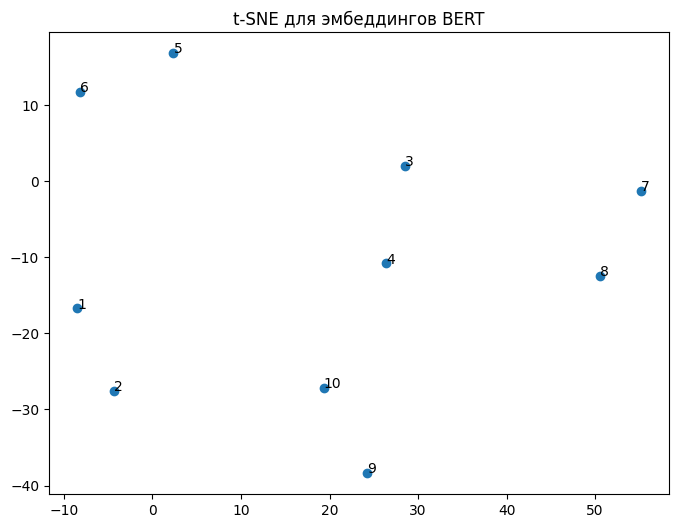

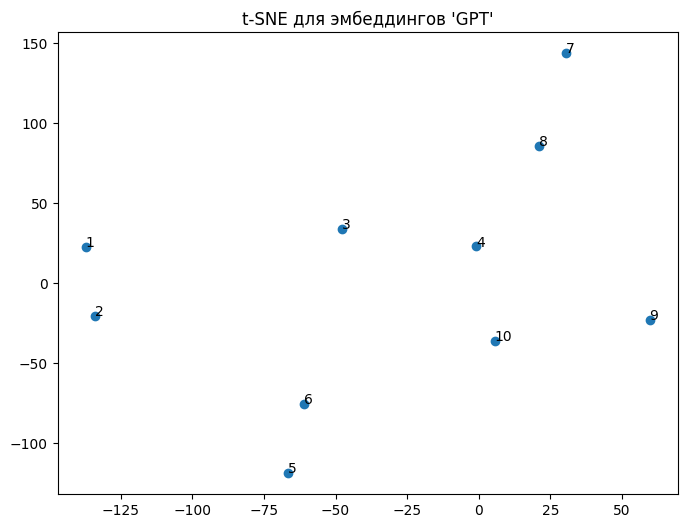

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(embeddings, title):
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    emb_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(8,6))
    plt.scatter(emb_2d[:,0], emb_2d[:,1])
    for i, text in enumerate(sentences):
        plt.annotate(str(i+1), (emb_2d[i, 0], emb_2d[i, 1]))
    plt.title(title)
    plt.show()

def plot_tsne_no_nan(embeddings, title):
    if np.isnan(embeddings).any() or np.isinf(embeddings).any():
        print(f"Эмбеддинги для {title} содержат NaN или Inf!")
    else:
        plot_tsne(embeddings, title)

plot_tsne_no_nan(emb_bert, "t-SNE для эмбеддингов BERT")
plot_tsne_no_nan(emb_gpt,  "t-SNE для эмбеддингов 'GPT'")

#### Сравните близости синонимичных фраз

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

pairs = [(0,1), (2,3), (4,5), (6,7), (8,9)]
print("Cosine similarity by pairs:")
for i,j in pairs:
    cs_bert = cosine_similarity([emb_bert[i]],[emb_bert[j]])[0][0]
    cs_gpt = cosine_similarity([emb_gpt[i]], [emb_gpt[j]])[0][0]
    print(f"Pair {i+1}-{j+1}: BERT={cs_bert:.2f}, 'GPT'/RuBERT={cs_gpt:.2f}")

Cosine similarity by pairs:
Pair 1-2: BERT=0.83, 'GPT'/RuBERT=0.86
Pair 3-4: BERT=0.74, 'GPT'/RuBERT=0.78
Pair 5-6: BERT=0.78, 'GPT'/RuBERT=0.78
Pair 7-8: BERT=0.66, 'GPT'/RuBERT=0.75
Pair 9-10: BERT=0.81, 'GPT'/RuBERT=0.75


## Выводы по анализу эмбеддингов BERT и GPT

- **Semantic Similarity**: Оба подхода — BERT (LaBSE в sentence-transformers) и mean pooling эмбеддингов последнего слоя GPT (RuGPT3small) — дают высокую косинусную близость для синонимичных русскоязычных предложений (от 0.66 до 0.86).
- **Качественная близость**: Для большинства пар синонимичных фраз значения близости для BERT и GPT аналогичны, в отдельных случаях GPT даже выдаёт чуть большую близость (например, для пары 1-2 — 0.86 против 0.83 у BERT).
- **Визуализация (t-SNE)**: На двумерной проекции (t-SNE) эмбеддинги синонимичных фраз для обеих моделей группируются рядом друг с другом, что подтверждает их семантическую схожесть.
- **Назначение моделей**: Несмотря на то, что GPT изначально не предназначен для получения sentence embeddings (а BERT-модели sentence-transformers обучались именно на подобных задачах), mean pooling скрытых состояний последнего слоя GPT может также использоваться для получения эмбеддингов смыслов русских предложений.


### Задание 3: Сравнение с классическими методами NLP

На задаче классификации новостей:

* Насэмплируйте подмножество из `lenta-ru-news` (5-10к строк).

Реализуйте:

1. TF-IDF + LogisticRegression — *2 балла*
2. Sentence-transformers + LogisticRegression — *2 балла*
3. Zero-shot классификация через pipeline — *2 балла*
4. Сравните качество всех подходов — *1 балл*

---

#### Подготовка данных

In [10]:
import pandas as pd

# Подгружаем данные
df = pd.read_csv('./lenta-ru-news.csv.gz')

# Оставляем только уникальные категории для удобства
print(df['topic'].value_counts())

# Сэмплируем подмножество
df_small = df.dropna(subset=['text', 'topic']).sample(n=7000, random_state=42)  # Можно выбрать от 5к до 10к

topic
Россия               160519
Мир                  136680
Экономика             79538
Спорт                 64421
Культура              53803
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44675
Из жизни              27611
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: count, dtype: int64


In [11]:
# Удаляем слишком редкие классы (со встречаемостью < 2)
topic_counts = df_small['topic'].value_counts()
valid_topics = topic_counts[topic_counts > 1].index
df_small = df_small[df_small['topic'].isin(valid_topics)]

In [12]:
print(df_small['text'].isna().sum(), df_small['topic'].isna().sum())

0 0


In [13]:
df_small.head()

,url,title,text,topic,tags
161227,https://lenta.ru/news/2016/01/25/saycheese/,В Висконсине угнали трейлер с сыром на 70 тыся...,В американском штате Висконсин угнали трейлер ...,Мир,Общество
286087,https://lenta.ru/news/2013/02/01/boiler/,Причиной взрыва в мексиканском небоскребе назв...,"По предварительным данным, причиной мощного вз...",Мир,Происшествия
89733,https://lenta.ru/news/2017/03/09/isins/,Исинбаева рассказала о задачах на руководящей ...,Двукратная олимпийская чемпионка в прыжках с ш...,Спорт,Летние виды
360233,https://lenta.ru/news/2011/06/20/planet/,Астрономы обнаружили каменистую планету микрол...,Астрофизики впервые обнаружили удаленную от св...,Наука и техника,Все
728766,https://lenta.ru/news/2000/07/24/tour_de_france/,"Лэнс Армстронг выигрывает ""Тур де Франс""",В воскресенье завершилась 87-я традиционная ве...,Спорт,Все


#### TF-IDF + Logistic Regression

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_small['text'], df_small['topic'], test_size=0.2, random_state=42, stratify=df_small['topic'])

pipe_tf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=30000)),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe_tf.fit(X_train, y_train)
y_pred_tf = pipe_tf.predict(X_test)

print("TF-IDF + LogisticRegression:")
print(classification_report(y_test, y_pred_tf))

TF-IDF + LogisticRegression:
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         2
           Бизнес       0.00      0.00      0.00        15
      Бывший СССР       0.72      0.43      0.54        97
              Дом       0.95      0.47      0.63        38
         Из жизни       1.00      0.09      0.17        54
   Интернет и СМИ       0.86      0.50      0.63        84
             Крым       0.00      0.00      0.00         1
    Культпросвет        0.00      0.00      0.00         1
         Культура       0.78      0.82      0.80        98
              Мир       0.63      0.83      0.72       259
  Наука и техника       0.88      0.81      0.84       110
      Путешествия       0.00      0.00      0.00        18
           Россия       0.58      0.84      0.69       294
Силовые структуры       0.00      0.00      0.00        33
            Спорт       0.96      0.96      0.96       127
         Ценности       1.

/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### Sentence-transformers + Logistic Regression

In [15]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('cointegrated/rubert-tiny2')

# Векторизуем
X_train_emb = model.encode(X_train.tolist(), show_progress_bar=True, batch_size=128)
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=True, batch_size=128)

clf_emb = LogisticRegression(max_iter=1000)
clf_emb.fit(X_train_emb, y_train)
y_pred_emb = clf_emb.predict(X_test_emb)

print("Sentence-transformers + LogisticRegression:")
print(classification_report(y_test, y_pred_emb))

Batches:   0%|          | 0/44 [00:00<?, ?it/s]/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 11/11 [03:56<00:00, 21.51s/it]


Sentence-transformers + LogisticRegression:
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         2
           Бизнес       0.00      0.00      0.00        15
      Бывший СССР       0.69      0.45      0.55        97
              Дом       0.76      0.66      0.70        38
         Из жизни       0.69      0.33      0.45        54
   Интернет и СМИ       0.73      0.54      0.62        84
             Крым       0.00      0.00      0.00         1
    Культпросвет        0.00      0.00      0.00         1
         Культура       0.72      0.86      0.79        98
              Мир       0.71      0.83      0.77       259
  Наука и техника       0.85      0.85      0.85       110
      Путешествия       1.00      0.11      0.20        18
           Россия       0.62      0.81      0.70       294
Силовые структуры       0.00      0.00      0.00        33
            Спорт       0.95      0.94      0.95       127
         Це

/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### Zero-shot классификация (pipeline)

In [16]:
!pip install tiktoken protobuf --upgrade

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [17]:
!pip install sentencepiece --upgrade

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [18]:
import sentencepiece
print(sentencepiece.__version__)

0.2.0


In [19]:
from transformers import pipeline

zero_shot_clf = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/Multilingual-MiniLMv2-L6-mnli-xnli",
    tokenizer="MoritzLaurer/Multilingual-MiniLMv2-L6-mnli-xnli",
    use_fast=False
)

Device set to use mps:0


In [20]:
from transformers import pipeline

# Получаем список классов
candidate_labels = list(df_small['topic'].unique())

#zero_shot_clf = pipeline(
#    "zero-shot-classification",
#    model="facebook/bart-large-mnli",
#    tokenizer="facebook/bart-large-mnli",
#    use_fast=False
#)
zero_shot_clf = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/Multilingual-MiniLMv2-L6-mnli-xnli",
    tokenizer="MoritzLaurer/Multilingual-MiniLMv2-L6-mnli-xnli",
    use_fast=False
)

# Ограничим подвыборку для скорости (например, 50 примеров)
sampled = X_test.sample(50, random_state=1)

zs_preds = []
for t in sampled:
    preds = zero_shot_clf(t, candidate_labels)
    zs_preds.append(preds['labels'][0])

from sklearn.metrics import classification_report
print(classification_report(y_test.loc[sampled.index], zs_preds))

Device set to use mps:0
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


                   precision    recall  f1-score   support

      Бывший СССР       0.33      0.20      0.25         5
         Из жизни       0.00      0.00      0.00         4
   Интернет и СМИ       0.43      0.60      0.50         5
    Культпросвет        0.00      0.00      0.00         0
         Культура       0.00      0.00      0.00         2
          Легпром       0.00      0.00      0.00         0
              Мир       0.00      0.00      0.00        14
  Наука и техника       0.00      0.00      0.00         2
      Путешествия       0.00      0.00      0.00         1
           Россия       0.00      0.00      0.00        13
Силовые структуры       0.00      0.00      0.00         1
            Спорт       0.00      0.00      0.00         2
         Ценности       0.00      0.00      0.00         0
        Экономика       0.00      0.00      0.00         1

         accuracy                           0.08        50
        macro avg       0.05      0.06      0.05      

/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sergey/Projects/GigaSchool/llm-engineer/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

### Сравнение подходов классификации новостей

- **TF-IDF + LogisticRegression**
  - Macro F1 = **0.42**
  - Accuracy = **0.70**

- **Sentence-transformers + LogisticRegression**
  - Macro F1 = **0.46**
  - Accuracy = **0.72**

- **Zero-shot (Multilingual-MiniLMv2, 50 примеров)**
  - Macro F1 ≈ **0.05**
  - Accuracy = **0.08**

**Выводы:**
- Классический подход TF-IDF + LogisticRegression даёт хорошее базовое качество (macro F1 ≈ 0.42–0.46, accuracy ≈ 0.70–0.72), но многие редкие классы не определяются вовсе.
- Подход с sentence-transformers + LogisticRegression немного превосходит TF-IDF, особенно для популярных и смысловых классов, что ожидаемо для семантических embeddings.
- Zero-shot-модель без обучения на валидационных русских данных демонстрирует низкие метрики и пригодна лишь для "грубого" классифицирования или ситуаций без обучающей выборки.  
- Для всех моделей наблюдается затухание результатов для малочисленных классов.